# Exploratory Data Analysis

It is an approach to analysing the datasets in hand and obtaining confidence in them, summarising their main characteristics using various visual methods so as to come to a point where we are ready to engage with an ML algorithm applied on these datasets. 

EDA reveals certain insights from the data which may not be apparent in formal modelling approaches.

### Importing Libraries and Exploring the dataset 

In [1]:
import numpy as np #linear algebra 
import pandas as pd #data processing, CSV file I/O
from matplotlib import pyplot as plt #data vis
import seaborn as sns #stat data vis 
import statsmodels.api as sm 
import scipy.stats as stats 
from sklearn.preprocessing import LabelEncoder
import copy 
sns.set() #setting the default seaborn style for our plots 

In [2]:
#Read the Dataset 
insurance_df = pd.read_csv("insurance-data.csv")

In [3]:
#Display the first 5 examples in the dataset 
insurance_df.head(5) 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#info about the data: shape, type of individual columns 
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Interpretation: 
The data consists of 1338 instances with 7 attributes: 2 integer type, 2 float type, 3 object type (strings in the column).

### Checking missing values and Outliers 

In [5]:
#Check for the null values 
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


Interpretation: 
There aren't any missing values. 

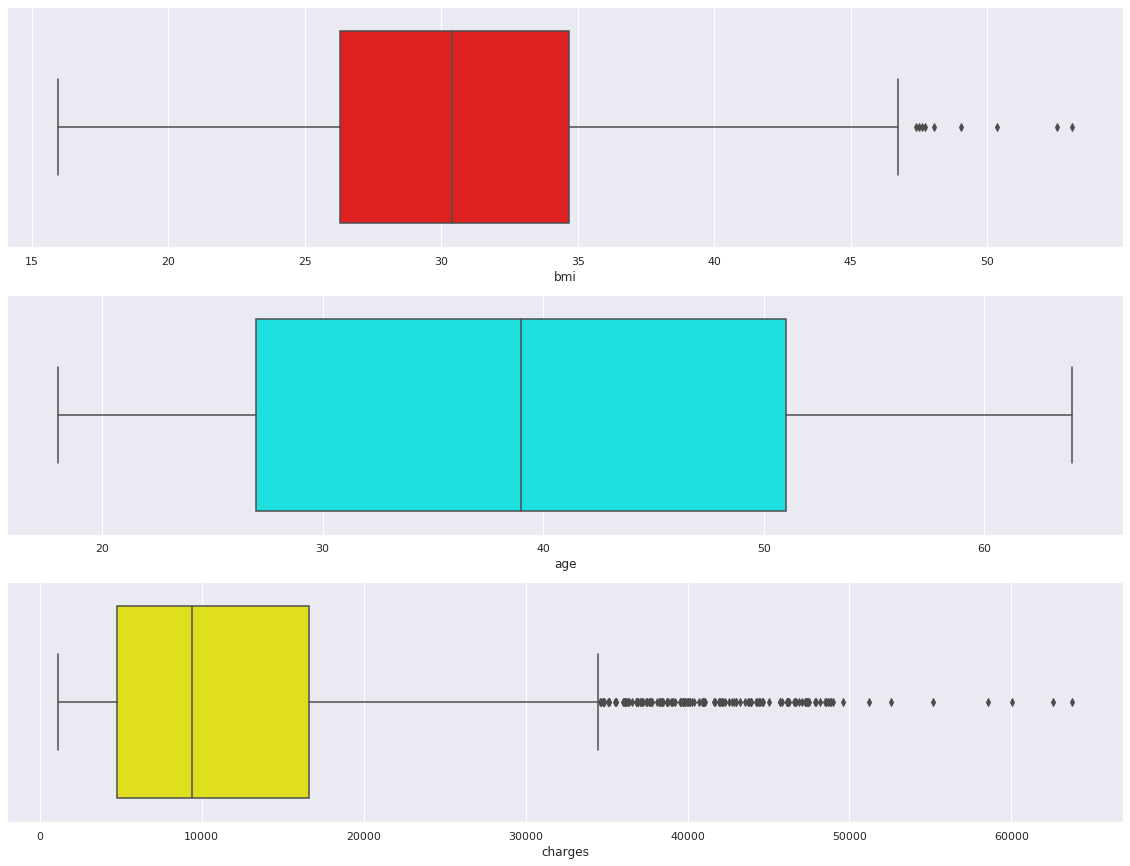

In [6]:
#checking for the Outliers 
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df.bmi, color='red')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_df.age, color='cyan')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_df.charges, color='yellow')

plt.show()

Interpretation: 
- bmi has a few extreme values 
- charges is highly skewed

In [7]:
#brief summary of the dataset 

insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Interpretation:
- All the statistics seem reasonable 
- Age column: data looks representative of the true age distribution of the adult population with (39) mean.
- Children column: few people have more than 2 children (75% of the people have 2 or less than 2 children).
- The claimed amount (charges) is highly skewed as most people would require basic medicare and only a few may suffer from diseases which cost more to get rid of. 

### Creating Visual methods to analyse the data 

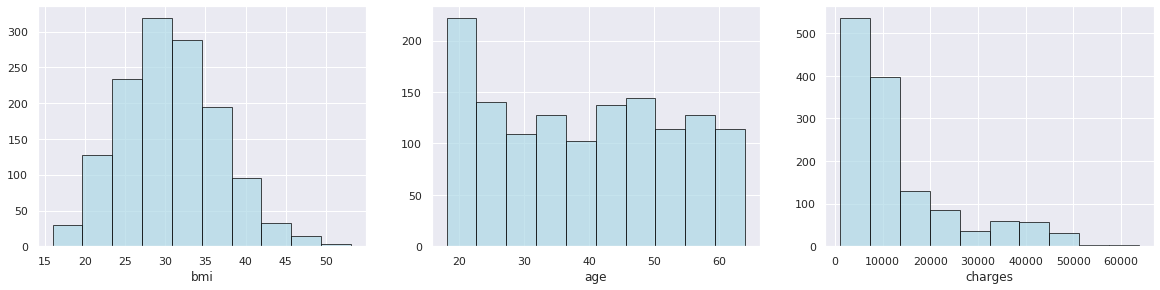

In [13]:
#Plots to see the distribution of continuous features individually 

plt.figure(figsize= (20, 15))
plt.subplot(3, 3, 1)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor= 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3, 3, 2)
plt.hist(insurance_df.age, color='lightblue', edgecolor= 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3, 3, 3)
plt.hist(insurance_df.charges, color='lightblue', edgecolor= 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

Interpretation:
- bmi looks normally distributed
- age looks uniformly distributed 
- As seen in the previous step, charges are highly skewed. 

In [18]:
#showing the skewness of variables 
Skewness = pd.DataFrame({'Skewness': [stats.skew(insurance_df.bmi), stats.skew(insurance_df.age), stats.skew(insurance_df.charges)]},
                       index = ['bmi', 'age', 'charges']) #Measure the skewness of the required columns

In [19]:
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


Interpretation: 
- Skewness of bmi is very low as seen in the previous step 
- age is uniformly distributed and thus, not skewed 
- charges are highly skewed 

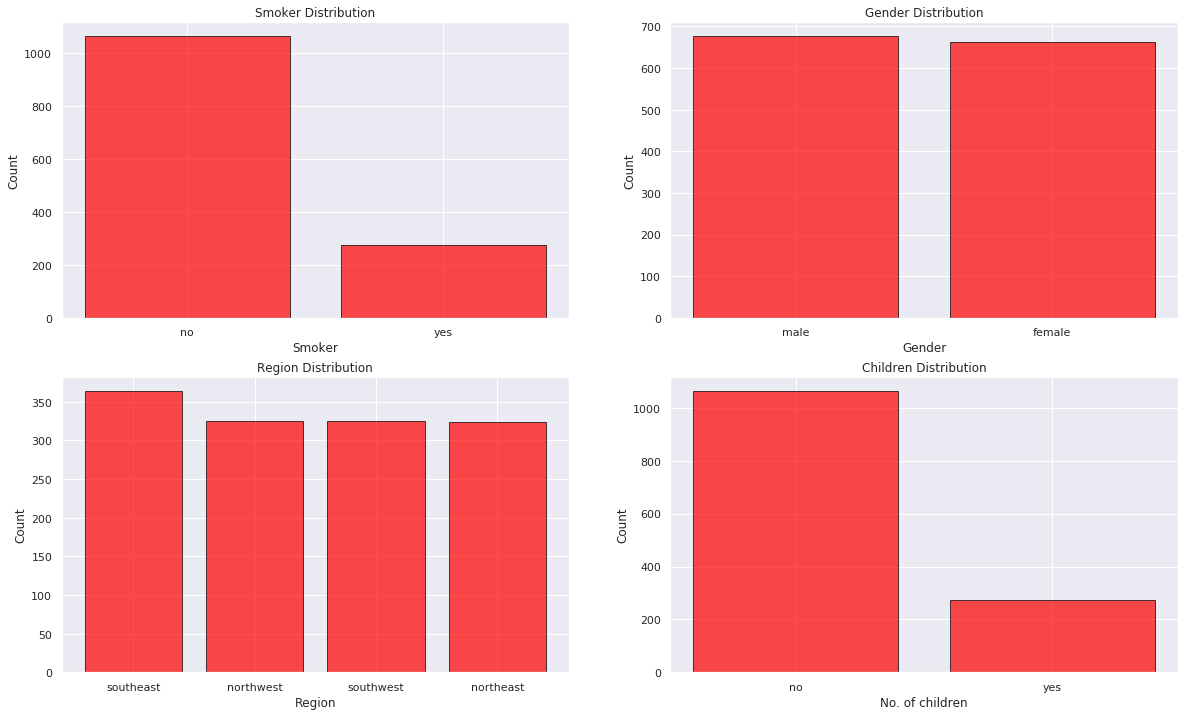

In [22]:
#visualising the data to analyse 

plt.figure(figsize=(20, 25))

#smoker plot 
x = insurance_df.smoker.value_counts().index  #Value for x axis 
y = [insurance_df['smoker'].value_counts()[i] for i in x] #Count of each class on y axis 

plt.subplot(4, 2, 1)
plt.bar(x,y, align ='center', color ='red', edgecolor ='black', alpha = 0.7)  #plot a bar chart, alpha indicates transparency of graph 
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Distribution')

#gender plot 
x1 = insurance_df.sex.value_counts().index
y1 = [insurance_df['sex'].value_counts()[j] for j in x1]

plt.subplot(4, 2, 2)
plt.bar(x1,y1, align ='center', color ='red', edgecolor ='black', alpha = 0.7)  #plot a bar chart, alpha indicates transparency of graph 
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

#region plot 
x2 = insurance_df.region.value_counts().index  #Value for x axis 
y2 = [insurance_df['region'].value_counts()[k] for k in x2] #Count of each class on y axis 

plt.subplot(4, 2, 3)
plt.bar(x2,y2, align ='center', color ='red', edgecolor ='black', alpha = 0.7)  #plot a bar chart, alpha indicates transparency of graph 
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')

#children plot 
x3 = insurance_df.children.value_counts().index  #Value for x axis 
y3 = [insurance_df['children'].value_counts()[l] for l in x3] #Count of each class on y axis 

plt.subplot(4, 2, 4)
plt.bar(x,y, align ='center', color ='red', edgecolor ='black', alpha = 0.7)  #plot a bar chart, alpha indicates transparency of graph 
plt.xlabel('No. of children')
plt.ylabel('Count')
plt.title('Children Distribution')

plt.show()

Interpretation:
- There are lot more non-smokers than smokers 
- Instances are evenly distributed across both genders and all regions
- Most instances have less than 3 children and very few have 4 or 5 children 

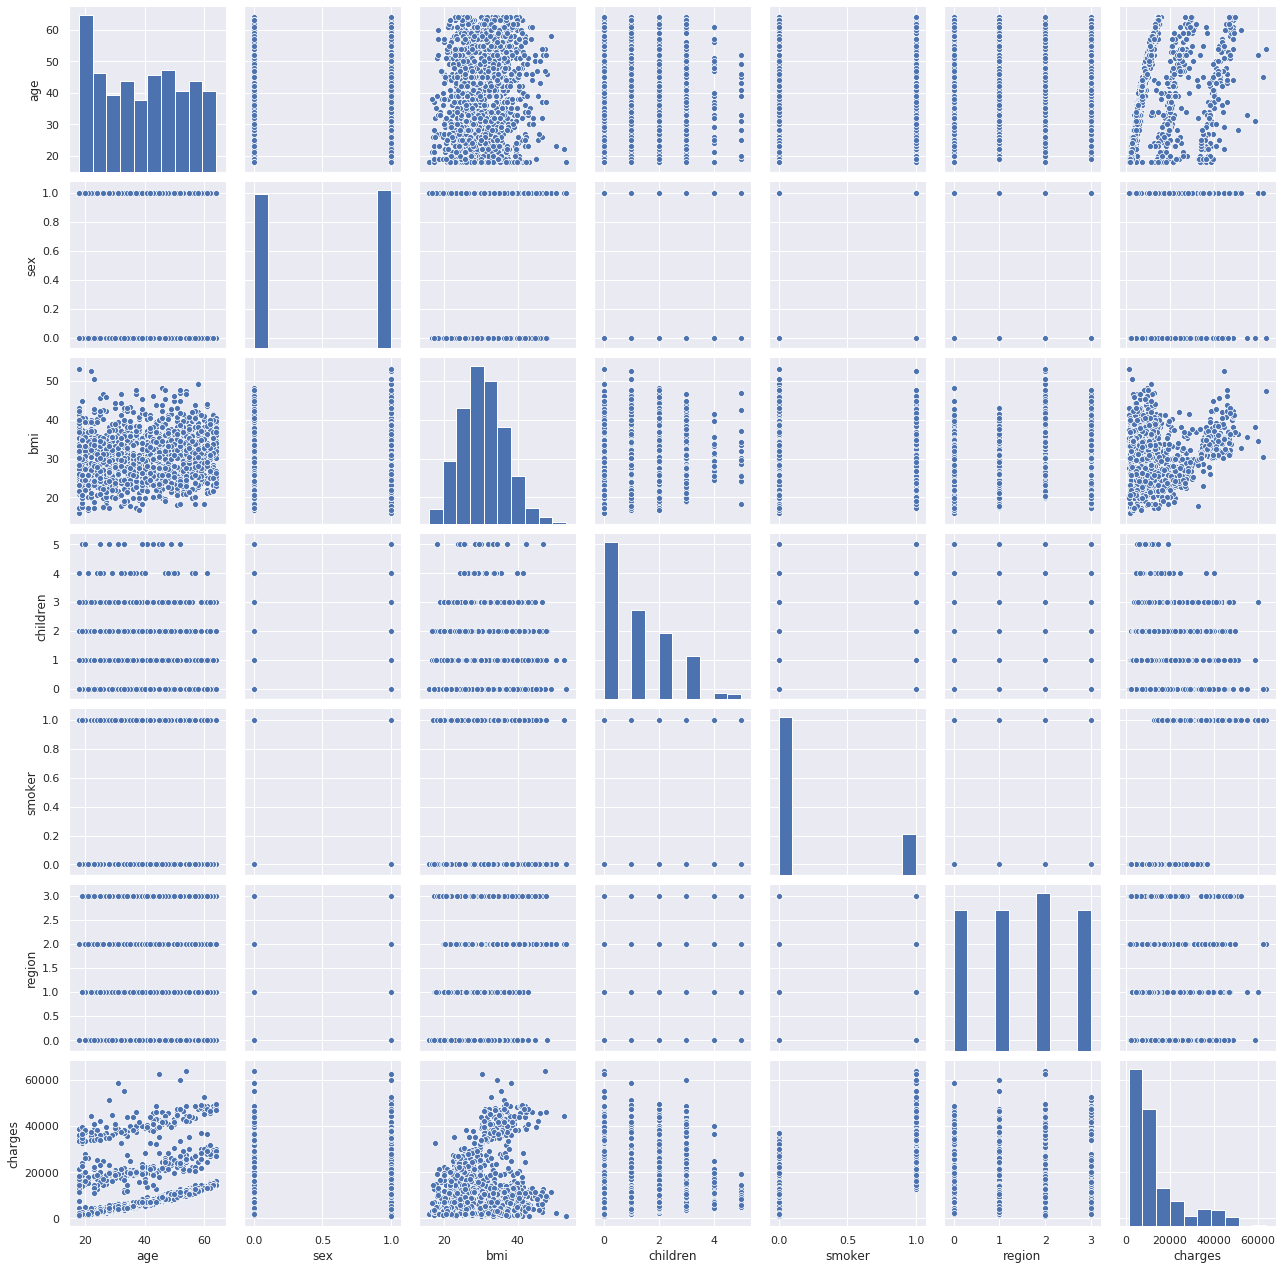

In [23]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings 

insurance_df_encoded= copy.deepcopy(insurance_df)
insurance_df_encoded.loc[:, ['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:, ['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

#pairplots
sns.pairplot(insurance_df_encoded)
plt.show()

Interpretation:
- There is an obvious correlation between charges and smokers: smokers claimed more money than non smokers.
- Between age and charges, it can be seen that older people are charged more than younger ones 

### Analysing trends, patterns and relationships in the data

We intend to tackle certain questions like:

Do charges of people who smoke differ significantly from the people who don't? 

In [24]:
insurance_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

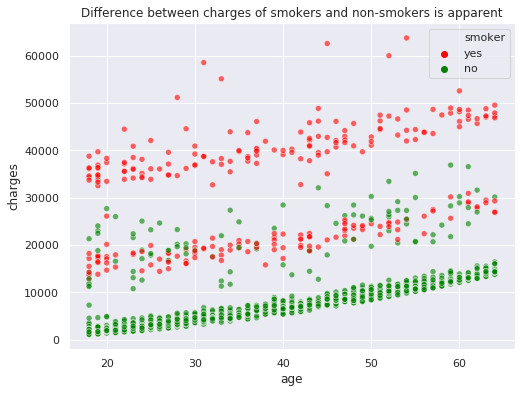

In [26]:
#scatter plot to look for visual evidence of dependency between attributes smoker and charges across different ages 
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue =insurance_df.smoker, palette =['red', 'green'], alpha =0.6)
plt.title("Difference between charges of smokers and non-smokers is apparent")
plt.show()

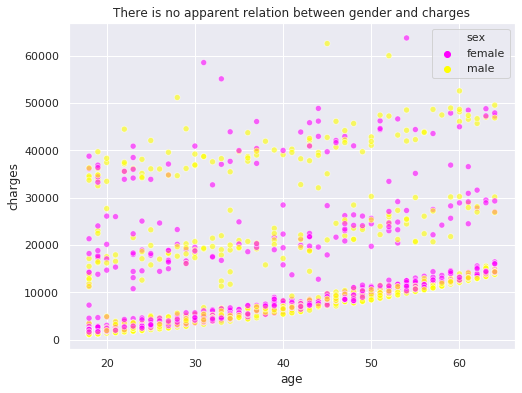

In [29]:
#repeating the same for gender attribute
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue =insurance_df.sex, palette =['magenta', 'yellow'], alpha =0.6)
plt.title("There is no apparent relation between gender and charges")
plt.show()

In [30]:
#T-Test to check dependency of charges on smoking 
ho = "Charges of smoker and non-smoker are same" #Null Hypothesis 
ha = "Charges of smoker and non-smoker are not the same" #Alternate Hypothesis

x = np.array(insurance_df[insurance_df.smoker == 'yes'].charges) #Storing charges for smokers in an array
y = np.array(insurance_df[insurance_df.smoker == 'no'].charges)  #Storing charges for non-smokers in an array 

t, p_value = stats.ttest_ind(x, y, axis=0)  #Performing an indenpendent t test 

if p_value < 0.05: #setting our significance level at 5%
    print(f'{ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


Interpretation: Since our p value is low, it proves that our data did not occur by chance. Thus, smokers seem to claim significantly more money than non-smokers. 

**Another Question:
Does BMI of males differ significantly from that of females?**

In [31]:
insurance_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [32]:
#T-Test to check dependency of bmi on gender 
ho = "Gender has no effect on bmi" #Null Hypothesis 
ha = "Gender has an effect on bmi" #Alternate Hypothesis

x = np.array(insurance_df[insurance_df.sex == 'male'].bmi) 
y = np.array(insurance_df[insurance_df.sex == 'female'].bmi)  

t, p_value = stats.ttest_ind(x, y, axis=0)  #Performing an indenpendent t test 

if p_value < 0.05: #setting our significance level at 5%
    print(f'{ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{ho} as the p_value ({p_value}) > 0.05')

Gender has no effect on bmi as the p_value (0.08997637178984932) > 0.05


Thus, BMI of both genders are identical

**Question: Is the proportion of smokers significantly different in different genders?**

In [34]:
#chi-square test to check if smoking habits vary with gender 
ho = "Gender has no effect on smoking habits" #Null Hypothesis 
ha = "Gender has an effect on smoking habits" #Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])  #Contingency table of sex and smoking attributes 

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05: #setting our significance level at 5%
    print(f'{ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{ho} as the p_value ({p_value.round(3)}) > 0.05')

crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Proportion of smokers in males is significantly different from that of females. 

In [35]:
#chi-square test to check if smoking habits are different for people of different regions 
ho = "Region has no effect on smoking habits" #Null Hypothesis 
ha = "Region has an effect on smoking habits" #Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['smoker'], insurance_df['region'])  #Contingency table of regions and smoking attributes 

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05: #setting our significance level at 5%
    print(f'{ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{ho} as the p_value ({p_value.round(3)}) > 0.05')

crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


Smoking habits of poeple from different regions are quite similar 

**Question: Is the distribution of bmi across women with 0, 1, 2 children the same?**

In [36]:
#Test to see if the distribution of bmi values for females having different number of children, are same
ho = "No. of children has no effect on bmi" #Null Hypothesis 
ha = "No. of children has an effect on bmi" #Alternate Hypothesis

female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero, one, two)

if p_value < 0.05: #setting our significance level at 5%
    print(f'{ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
